In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.chdir('/content/drive/My Drive/Colab Notebooks')

In [ ]:
!pip install sktime
!pip install sktime[all_extras]

     |████████████████████████████████| 5.6MB 3.8MB/s 
     |████████████████████████████████| 6.8MB 40.4MB/s 
     |████████████████████████████████| 9.5MB 36.3MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
     |████████████████████████████████| 92kB 3.9MB/s 
     |████████████████████████████████| 11.6MB 196kB/s 
     |████████████████████████████████| 1.5MB 44.3MB/s 
     |████████████████████████████████| 665kB 31.4MB/s 
     |████████████████████████████████| 92kB 8.4MB/s 
     |████████████████████████████████| 102kB 7.1MB/s 
  Created wheel for contextvars: filename=contextvars-2.4-cp36-none-any.whl size=7666 sha256=c7581a07ea9d530e968e7c33f8c5d844cff5a8e1ce4d1112a3c6821116578352
  Stored in directory: /root/.cache/pip/wheels/a5

In [ ]:
from sklearn import metrics
from sklearn.model_selection import train_test_split

from sktime.classification.shapelet_based import MrSEQLClassifier
from sktime.datasets import load_arrow_head, load_basic_motions

import time
import pandas as pd
import numpy as np

## **fNIRS Data**

In [ ]:
# Loading dataset

import pandas as pd
import numpy as np

namesCol = ['Subject Name', 'Event Name', 'Channel Name', 'Start time', 'End time']

for q in range(131):
  strVar = 'v' + str(q)
  namesCol.append(strVar)

# df = pd.read_csv('allch_axcaxwr.csv', header = 0, names = namesCol)
df = pd.read_csv('211_AXCPT19_TK_axcaxwr_hb_cs539.csv', header = 0, names = namesCol)
# df = pd.read_csv('allch_axcaxwr.csv')
df_copy = df.copy()

# df_uci = pd.read_csv('train_co2a0000364.rd.000', skiprows = 4, sep = " ")
# df_uci.head()

col_name = list(df.columns)
trans_df = pd.DataFrame(data = df, columns = col_name)


# Getting X and y

# map = {"AX wrong probe response": 0, "AX correct probe response": 1}
# trans_df['Event Name'] = trans_df['Event Name'].apply(lambda x: map[x])

# Get Y-target -df
y = trans_df['Event Name']

# Drop target variable and get X-feature- df
X = trans_df.drop(['Event Name'], axis = 1)


# Train-test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)


# Label Encoding for X dataset

from sklearn import preprocessing


# Label Encoding for x dataset - not required

cat_cols = ['Subject Name', 'Channel Name']
enc = preprocessing.LabelEncoder()

for col in cat_cols:
  X_train[col] = X_train[col].astype('str')
  X_test[col] = X_test[col].astype('str')
  X_train[col] = enc.fit_transform(X_train[col])
  X_test[col] = enc.transform(X_test[col])

(920, 135) (920,) (920, 135) (920,)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

In [ ]:
# y.value_counts()
# trans_df['Event Name']

In [ ]:
# y.value_counts()[0]

In [ ]:
# y.value_counts()[1] / (y.value_counts()[0] + y.value_counts()[1])

## **UCI EEG Big Data**

In [ ]:
# # Loading dataset

# namesCol = ['subject', 'group', 'condition', 'trial', 'channel']

# for q in range(256):
#   strVar = 'v' + str(q)
#   namesCol.append(strVar)

# df_train = pd.read_csv('eeg_train_uci.csv', header = 0, names = namesCol)
# df_test = pd.read_csv('eeg_test_uci.csv', header = 0, names = namesCol)

# col_name = list(df_train.columns)

# trans_df_train = pd.DataFrame(data = df_train, columns = col_name)
# trans_df_test = pd.DataFrame(data = df_test, columns = col_name)


# # Getting X and y 

# y_train = trans_df_train['condition']
# X_train = trans_df_train.drop(['condition'], axis = 1)

# y_test = trans_df_test['condition']
# X_test = trans_df_test.drop(['condition'], axis = 1)


# # Label Encoding

# from sklearn import preprocessing

# cat_cols = ['subject', 'group', 'channel']
# enc = preprocessing.LabelEncoder()

# for col in cat_cols:
#   X_train.loc[:, col] = X_train.loc[:, col].astype('str')
#   X_test.loc[:, col] = X_test.loc[:, col].astype('str')
#   X_train.loc[:, col] = enc.fit_transform(X_train.loc[:, col])
#   X_test.loc[:, col] = enc.transform(X_test.loc[:, col])

## **UCI EEG Small Data**

In [ ]:
# # Loading dataset

# namesCol = ['subject', 'group', 'condition', 'trial', 'channel']

# for q in range(256):
#   strVar = 'v' + str(q)
#   namesCol.append(strVar)

# # df = pd.read_csv('allch_axcaxwr.csv', header = 0, names = namesCol)
# df = pd.read_csv('eeg_small_uci.csv', header = 0, names = namesCol)
# # df = pd.read_csv('allch_axcaxwr.csv')
# df_copy = df.copy()

# # df_uci = pd.read_csv('train_co2a0000364.rd.000', skiprows = 4, sep = " ")
# # df_uci.head()

# col_name = list(df.columns)
# trans_df = pd.DataFrame(data = df, columns = col_name)


# # Getting X and y

# # map = {"AX wrong probe response": 0, "AX correct probe response": 1}
# # trans_df['Event Name'] = trans_df['Event Name'].apply(lambda x: map[x])

# # Get Y-target -df
# y = trans_df['condition']

# # Drop target variable and get X-feature- df
# X = trans_df.drop(['condition'], axis = 1)


# # Train-test Split

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
# print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)


# # Label Encoding for X dataset

# from sklearn import preprocessing


# # Label Encoding for x dataset - not required

# cat_cols = ['subject', 'group', 'channel']
# enc = preprocessing.LabelEncoder()

# for col in cat_cols:
#   X_train[col] = X_train[col].astype('str')
#   X_test[col] = X_test[col].astype('str')
#   X_train[col] = enc.fit_transform(X_train[col])
#   X_test[col] = enc.transform(X_test[col])

In [ ]:
# # Label Encoding for y dataset: 0 to majority and 1 to minority

# y_enc = preprocessing.LabelEncoder()

# y_train = y_train.astype('str')
# y_test = y_test.astype('str')
# y_train = y_enc.fit_transform(y_train)
# y_test = y_enc.transform(y_test)

In [ ]:
# a = y_test[y_test == 0]
# print(a.shape)
# print(5311+897)
# print(5311/6208.0)

In [ ]:
# Conversion to numpy array

X_train = X_train.values
X_test = X_test.values


## Reshaping the feature dataset

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


## Only for UCI EEG dataset

y_train = y_train.values
y_test = y_test.values
# y_train = y_train.reshape((y_train.shape[0], 1, 1))
# y_test = y_test.reshape((y_test.shape[0], 1, 1))

# a_y = y.values
# a_X = X.values

# a_yn = a_y.reshape((a_y.shape[0], 1, 1))
# a_Xn = a_X.reshape((a_X.shape[0], a_X.shape[1], 1))

In [ ]:
# For clf mode, column ensembling is required

from sktime.classification.compose import (
    ColumnEnsembleClassifier,
)

clf = ColumnEnsembleClassifier(
    estimators=[
        ("MrSEQL", MrSEQLClassifier(seql_mode='clf'), [0])
    ]
)

# Starting time
start = time.time()

# Fit training data
clf.fit(X_train, y_train)

# End time
end = time.time()

ValueError: ignored

In [ ]:
# ms = MrSEQLClassifier(seql_mode = "fs") # Without conversion to numpy array

# use sax by default
# ms = MrSEQLClassifier(seql_mode="clf")
# use sfa representations
# ms = MrSEQLClassifier(seql_mode='fs', symrep=['sfa'])
# use sax and sfa representations
# ms = MrSEQLClassifier(seql_mode='fs', symrep=['sax', 'sfa'])

# # Starting time
# start = time.time()

# # fit training data
# ms.fit(X_train, y_train)

# # End time
# end = time.time()


## Accuracy for UCI data - regression problem

# from sklearn.metrics import accuracy_score

predicted = clf.predict(X_test)

print("Accuracy with mr-seql: ", clf.score(X_test, y_test))
# print("Accuracy with mr-seql: ", accuracy_score(y_test, predicted))

## Accuracy for fNIRS data - classification problem
# print("Accuracy with mr-seql: ", clf.score(X_test, y_test))

# Total time taken
print(f"Runtime of the program is {end - start}")

In [ ]:
# # # AUC

# from sklearn.metrics import roc_auc_score

# # predicted = clf.predict(X_test)
# # fpr, tpr, thresholds = metrics.roc_curve(y_test, predicted)
# print("AUC Curve: ", roc_auc_score(y_test, predicted))

In [ ]:
# from sklearn.metrics import confusion_matrix

# confusion_matrix(y_test, predicted)

In [ ]:
# print("AUC Curve: ", metrics.auc(fpr, tpr))

In [ ]:
# Classification accuracy
# print("Accuracy with mr-seql: %2.3f", ms.score(y_test, predicted))
# Classification accuracy
# print("Accuracy with mr-seql: %2.3f", metrics.accuracy_score(y_test, predicted))

In [ ]:
# # For clf mode, column ensembling is required

# from sktime.classification.compose import (
#     ColumnEnsembleClassifier,
#     TimeSeriesForestClassifier,
# )

# clf = ColumnEnsembleClassifier(
#     estimators=[
#         ("MrSEQL", MrSEQLClassifier(seql_mode = "clf"), [0])
#     ]
# )
# clf.fit(X_train, y_train)
# clf.score(X_test, y_test)

In [ ]:
# from sklearn.pipeline import Pipeline
# from sktime.transformers.panel.compose import ColumnConcatenator

# steps = [
#     ("concatenate", ColumnConcatenator()),
#     ("MrSEQL", MrSEQLClassifier(seql_mode = "clf")),
# ]

# clf = Pipeline(steps)
# clf.fit(X_train, y_train)
# clf.score(X_test, y_test)

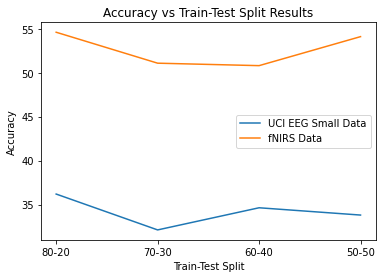

In [4]:
# import matplotlib.pyplot as plt

# names = ['80-20', '70-30', '60-40', '50-50']
# values = [36.19,	32.11,	34.63,	33.80]

# plt.plot(names, values)
# plt.ylabel('Accuracy')
# plt.xlabel('Train-Test Split')
# plt.title('UCI EEG Small Dataset')
# plt.show()

import matplotlib.pyplot as plt
# line 1 points
x1 = ['80-20', '70-30', '60-40', '50-50']
y1 = [36.19,	32.11,	34.63,	33.80]
# plotting the line 1 points 
plt.plot(x1, y1, label = "UCI EEG Small Data")
# line 2 points
x2 = ['80-20', '70-30', '60-40', '50-50']
y2 = [54.60,	51.08,	50.80,	54.10]
# plotting the line 2 points 
plt.plot(x2, y2, label = "fNIRS Data")
plt.xlabel('Train-Test Split')
# Set the y axis label of the current axis.
plt.ylabel('Accuracy')
# Set a title of the current axes.
plt.title('Accuracy vs Train-Test Split Results')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()


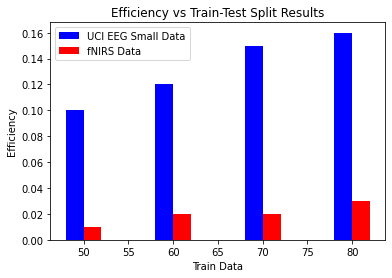

In [28]:
import matplotlib.pyplot as plt
# line 1 points
x1 = [79, 69, 59, 49]
y1 = [0.16, 0.15, 0.12, 0.10]
x2 = [81, 71, 61, 51]
# x2 = ['80-20', '70-30', '60-40', '50-50']
y2 = [0.03, 0.02, 0.02, 0.01]
# plotting the line 2 points 
ax = plt.subplot(111)
bar1 = ax.bar(x1, y1, width=2, color='b', align='center')
bar2 = ax.bar(x2, y2, width=2, color='r', align='center')
plt.xlabel('Train Data')
# Set the y axis label of the current axis.
plt.ylabel('Efficiency')
# Set a title of the current axes.
plt.title('Efficiency vs Train-Test Split Results')
# show a legend on the plot
plt.legend((bar1, bar2),('UCI EEG Small Data', 'fNIRS Data'))
# Display a figure.
plt.show()